# Corona Mask Classifier

In [1]:
images=[]

labels=[]

In [2]:
import os

In [3]:
os.listdir("D:/dataset")

['without_mask', 'with_mask']

In [4]:
import cv2

In [5]:
for i in ['without_mask', 'with_mask']:
    imageNameList=os.listdir("D:/dataset/" + str(i))
    for fileName in imageNameList:
        Image=cv2.imread("D:/dataset/" + str(i) + "/" + str(fileName))
        try:
            gray=cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
            Image=cv2.resize(gray,(100,100))
            images.append(Image)
            if i=="without_mask":
                labels.append(0)
            else:
                labels.append(1)
        except:
            pass
    print("Inside folder ", i)

Inside folder  without_mask
Inside folder  with_mask


In [6]:
import numpy as np

In [7]:
images=np.array(images)
labels=np.array(labels)

In [8]:
type(images)

numpy.ndarray

In [9]:
type(labels)

numpy.ndarray

In [10]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_features,test_features,train_target,test_target=train_test_split(images,labels,test_size=0.2)

In [13]:
train_features.shape

(1100, 100, 100)

In [14]:
train_target.shape

(1100,)

In [15]:
def preprocessing(img):
    img=img/255
    return img

In [16]:
train_features=np.array(list(map(preprocessing,train_features)))

In [17]:
train_features.shape

(1100, 100, 100)

In [18]:
test_features=np.array(list(map(preprocessing,test_features)))

In [19]:
test_features.shape

(276, 100, 100)

In [20]:
train_features=train_features.reshape(train_features.shape[0], train_features.shape[1],train_features.shape[2],1)

In [21]:
train_features.shape

(1100, 100, 100, 1)

In [22]:
test_features=test_features.reshape(test_features.shape[0],test_features.shape[1],test_features.shape[2],1)

In [23]:
test_features.shape

(276, 100, 100, 1)

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
dataGenerator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [26]:
dataGenerator.fit(train_features)

In [27]:
batches=dataGenerator.flow(train_features,train_target,batch_size=20)

In [28]:
batches

In [29]:
X_batch,Y_batch=next(batches)

In [30]:
import matplotlib.pyplot as plt

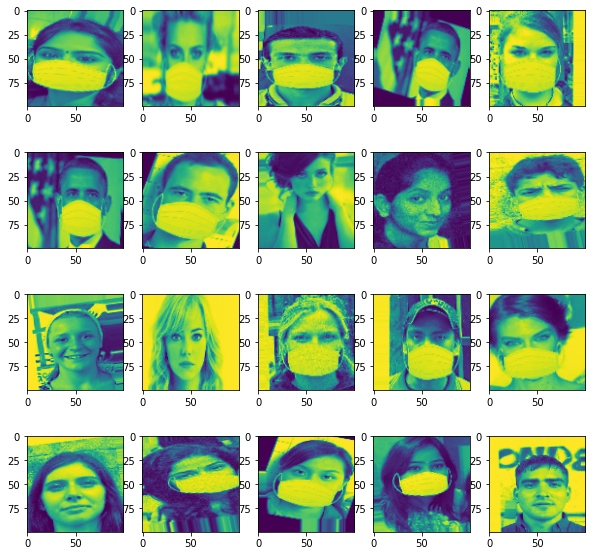

In [31]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_batch[i].reshape(100,100))
plt.show()

In [32]:
train_target.shape

(1100,)

In [33]:
test_target.shape

(276,)

In [34]:
from keras.utils import to_categorical

In [35]:
train_target=to_categorical(train_target)

In [36]:
test_target=to_categorical(test_target)

In [37]:
train_target.shape

(1100, 2)

In [38]:
test_target.shape

(276, 2)

In [39]:
train_features.shape

(1100, 100, 100, 1)

In [40]:
test_features.shape

(276, 100, 100, 1)

# Specification Of Model Architecture

In [41]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout

In [42]:
model=Sequential()
model.add(Conv2D(200,(3,3),activation="relu",input_shape=(100, 100, 1)))
model.add(Conv2D(150,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(300,activation="relu"))
model.add(Dense(2,activation="softmax"))

# Compilation Of Model

In [43]:
from keras.optimizers import Adam

In [44]:
model.compile(Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

# Fit the Model

In [45]:
model.fit(dataGenerator.flow(train_features,train_target,batch_size=20),epochs=15)

Epoch 1/15
55/55 [==============================] - 220s 4s/step - loss: 0.6823 - accuracy: 0.5575
Epoch 2/15
55/55 [==============================] - 223s 4s/step - loss: 0.6454 - accuracy: 0.6178
Epoch 3/15
55/55 [==============================] - 205s 4s/step - loss: 0.5528 - accuracy: 0.7131
Epoch 4/15
55/55 [==============================] - 200s 4s/step - loss: 0.3723 - accuracy: 0.8405
Epoch 5/15
55/55 [==============================] - 202s 4s/step - loss: 0.3339 - accuracy: 0.8650
Epoch 6/15
55/55 [==============================] - 206s 4s/step - loss: 0.2807 - accuracy: 0.8874
Epoch 7/15
55/55 [==============================] - 205s 4s/step - loss: 0.2335 - accuracy: 0.9056
Epoch 8/15
55/55 [==============================] - 202s 4s/step - loss: 0.2178 - accuracy: 0.9127
Epoch 9/15
55/55 [==============================] - 203s 4s/step - loss: 0.1702 - accuracy: 0.9439
Epoch 10/15
55/55 [==============================] - 204s 4s/step - loss: 0.2026 - accuracy: 0.9285
Epoch 11/

In [65]:
import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier("D:/haarcascade_frontalface_default.xml")

labels_dict={0:'NO MASK',1:'MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

cap=cv2.VideoCapture(0)

In [66]:
while True:
    success,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.2,10)
    for x,y,w,h in faces:
        face_img=gray[y:y+h,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=preprocessing(resized)
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
        
        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)
    cv2.imshow('Result',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
cv2.destroyAllWindows()
cap.release()